(friends-s01:r2_cortex)=
# R2 in the cortex
We examined next the fidelity of embedding fMRI time series in parcellation space, using time series from the validation subset of `friends-s01` and parcellations generated in the training subset, either from the same subject (intra-subject R2), or from a different subject (inter-subject R2). We also generated R2 maps using public group parcellations. As a preliminary analysis, we visualized {ref}`friends-s01:r2_maps` averaged across all runs, and noticed that central structures (thalami, basal ganglia) and the cerebellum had markedly lower R2 values (see Supplementary Material). We thus decided to consider the distribution of R2 only in the cortex for the selection of hyper-parameters, which is presented here. The distribution of {ref}`friends-s01:r2_central` and {ref}`friends-s01:r2_cerebellum` are available in Supplementary Material.

```{admonition} Computational reproducibility 
The results for this experiment have been precomputed usin the scripts `r2_summary.py` and `r2_friends-s01.sh`. The results are accessed using a number of helper tools available in the `r2_summary` module. The following hidden block of code loads the necessary libraries to generate the figures, sets the path to find the pre-comupted results as well as some visualisation parameters.
```

In [1]:
# import libraries 
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from cneuromod_embeddings.r2_summary import _r2_intra, _r2_inter, _r2_other

# Set the Seaborn parameters
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)

# Set up file names... where to find the data.
path_data = '/home/pbellec/git/cneuromod_embeddings/cneuromod_embeddings/friends-s01/'
path_results = os.path.join(path_data, 'r2_friends-s01_cortex')

fwhm = 5

# DYPAC
dypac60  = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-60.p')
dypac120 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-120.p')
dypac150 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-150.p')
dypac300 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-300.p')
dypac900 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-300_state-900.p')

# DYPAC inter-subject
inter60  = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-60.p')
inter120 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-120.p')
inter150 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-150.p')
inter300 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-300.p')
inter900 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-300_state-900.p')

# DIFUMO
difumo256  = os.path.join(path_results, f'r2_fwhm-difumo256_fwhm-{fwhm}.p')
difumo512  = os.path.join(path_results, f'r2_fwhm-difumo512_fwhm-{fwhm}.p')
difumo1024 = os.path.join(path_results, f'r2_fwhm-difumo1024_fwhm-{fwhm}.p')

# MIST
mist197 = os.path.join(path_results, f'r2_fwhm-mist197_fwhm-{fwhm}.p')
mist444 = os.path.join(path_results, f'r2_fwhm-mist444_fwhm-{fwhm}.p')

# Schaefer
schaefer = os.path.join(path_results, f'r2_fwhm-schaefer_fwhm-{fwhm}.p')

# Smith
smith70 = os.path.join(path_results, f'r2_fwhm-smith_fwhm-{fwhm}.p')

## R2 with `fwhm=5`
### DYPAC intra vs DIFUMO
We first compared subject-specific DYPAC parcellations with the highest resolution (`cluster-300_state-900`) with the group parcellation which currently has state-of-the-art performance for compressing fMRI activation maps, DIFUMO {cite}`Dadi2020-gb`. DIFUMO is avaible at different resolutions (`256`, `512`, `1024`), with higher resolutions leading to higher fidelity embedding. The following graph shows the average R2 across all voxels in the cortex and all runs in the `friends-s01` validation set, for each subject. The increase in resolution for DIFUMO leads to a marked increase in R2 for all subjects, from about 0.25 to over 0.4. The individual DYPAC parcellations (`cluster-300_state-900`) systematically achieve better compression of fMRI data for all subjects, with gains of about 0.05 in R2 over DIFUMO1024, while having a smaller number of parcels (900 for DYPAC vs 1024 in DIFUMO).

Text(0.5, 1.0, 'FWHM=5')

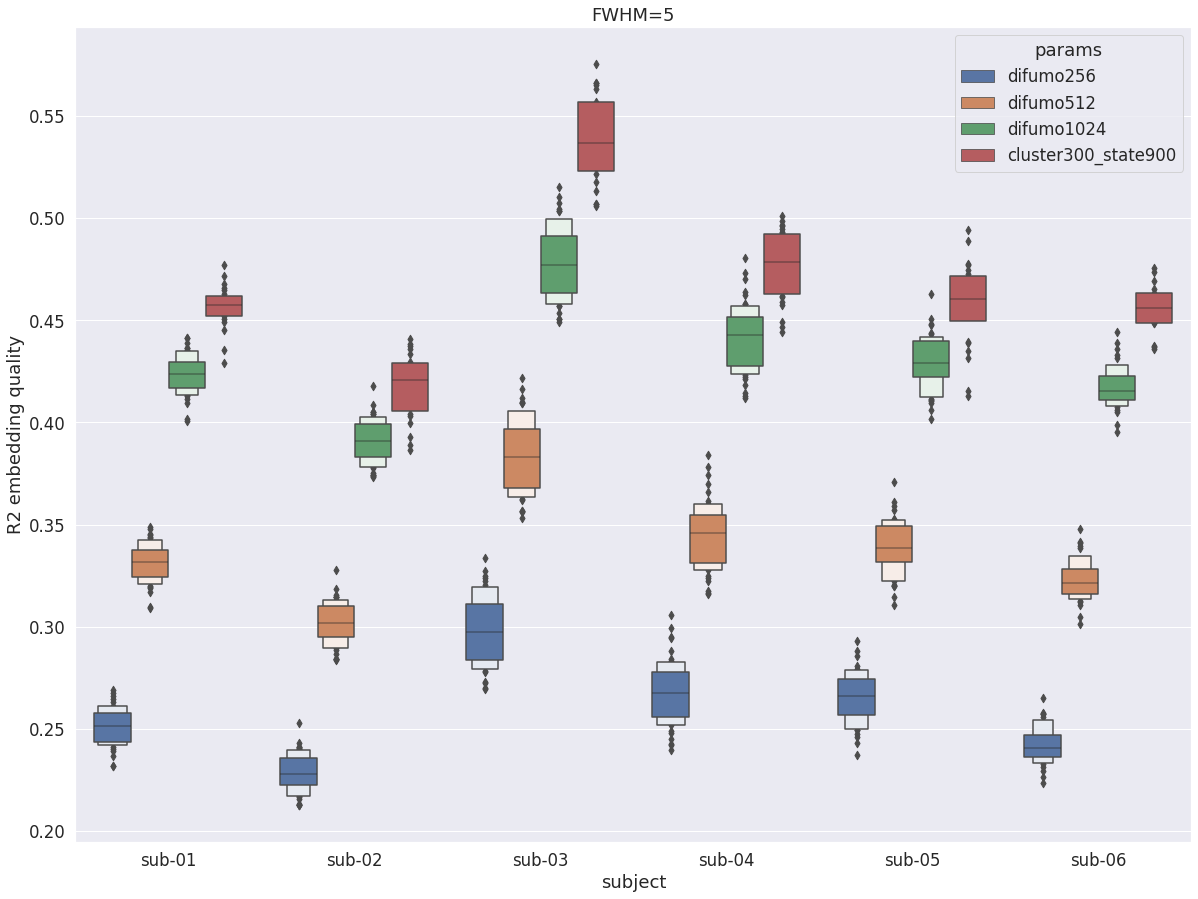

In [2]:
val_r2 = pd.read_pickle(difumo256)
val_r2 = val_r2.append(pd.read_pickle(difumo512))
val_r2 = val_r2.append(pd.read_pickle(difumo1024))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC intra vs other group parcellations
We then compared DYPAC parcels (`cluster-300_state-900`) with more traditional parcellation approaches such as low-dimensional independent component analysis {cite}`Smith2009-pt`(70 parcels), the MIST multi-resolution parcellations {cite}`Urchs2019-xc` (197 and 444 parcels) as well as the Schaefer atlas {cite}`Schaefer2018-ww` (400 parcels). The expected gains in R2 with increasing resolution in group parcellation is clear for all subjects, as previously shown by {cite}`Urchs2019-xc` and others. The `state-900` DYPAC parcels showed roughly 100% improvement in R2 for all subjects, from about 0.25 for the best static group parcellations to roughly 0.5 par DYPAC.

Text(0.5, 1.0, 'FWHM=5')

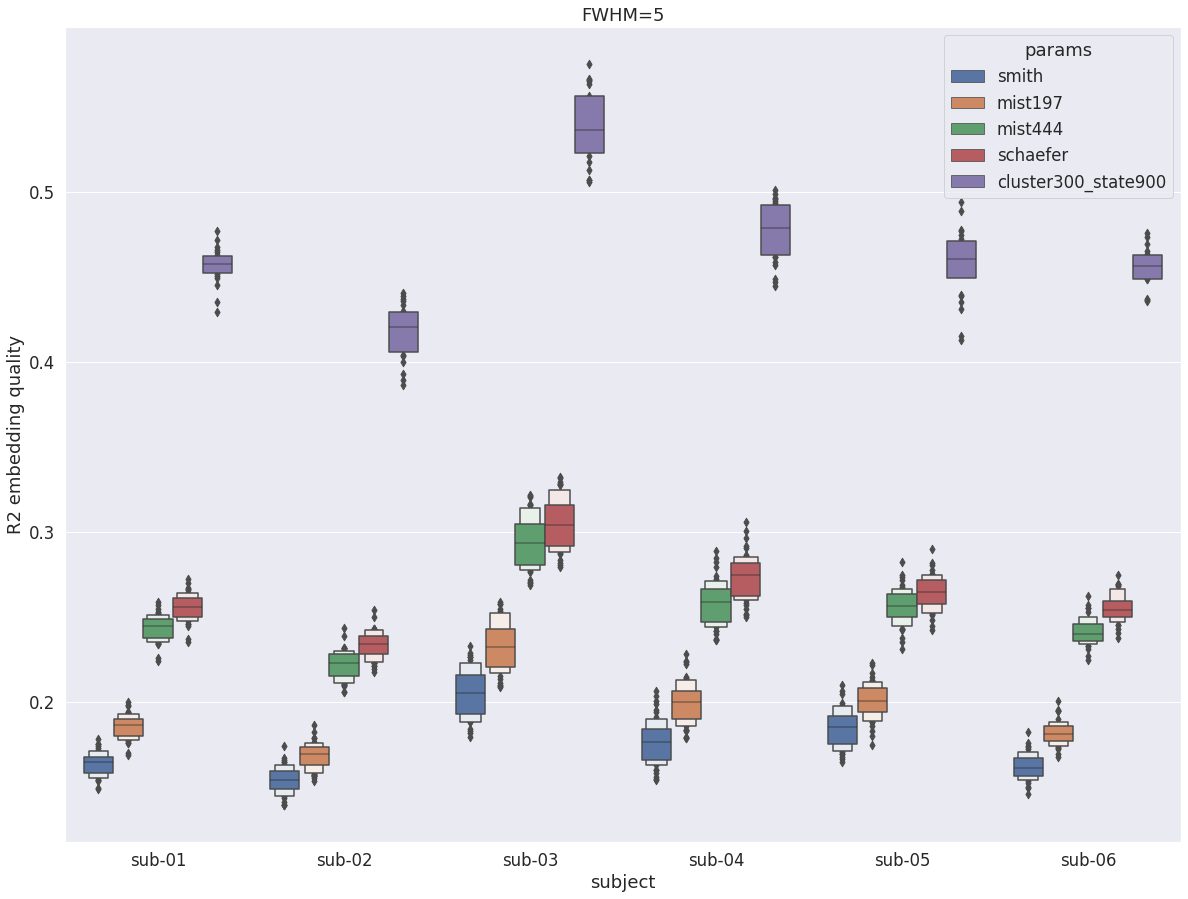

In [3]:
val_r2 = pd.read_pickle(smith70)
val_r2 = val_r2.append(pd.read_pickle(mist197))
val_r2 = val_r2.append(pd.read_pickle(mist444))
val_r2 = val_r2.append(pd.read_pickle(schaefer))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC multi-resolution

The following graph investigates the impact of the numbers `cluster` and `state` on average R2. The number of states appears to be the primary driver of R2. But even with 60 states, the R2 of individiual DYPAC parcellations is competitive with the best static group atlases (with 400+ parcels), and 120 states already outperforms them. But only the highest resolution individuals DYPAC parcellations outperform DIFUMO1024.

Text(0.5, 1.0, 'FWHM=5')

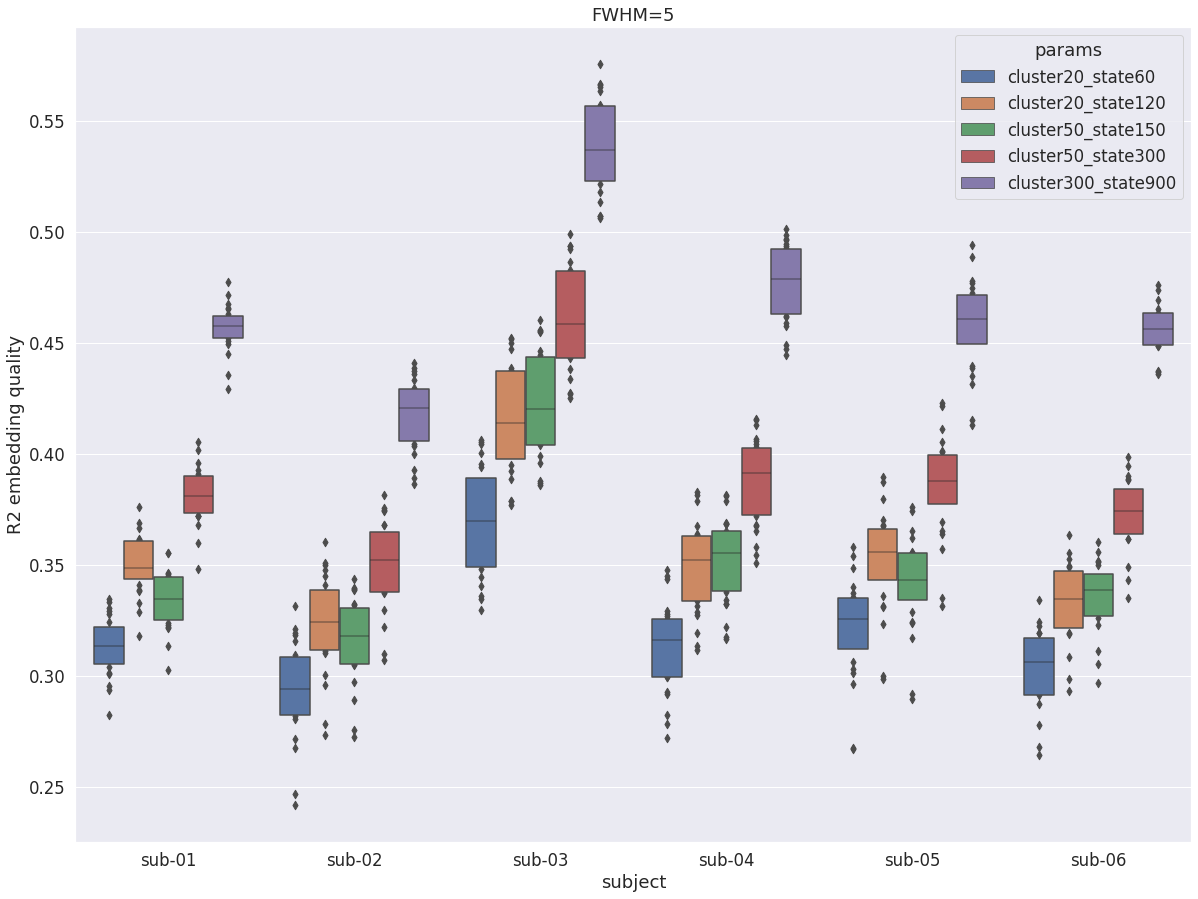

In [4]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### Intra- vs inter-subject R2
This last graph compares intra-subject embedding quality (parcellation and data come from the same subject) vs inter-subject embedding quality (parcellation and data come from different subject), for different numbers `cluster` and `state`. The average R2 in the cortex is systematically higher intra-subject than inter-subject. While the differenc is large between the two distributions for all parameters, the difference is reduced for higher resolution, and actually start to overlap for `cluster-300_state-900`.

Text(0.5, 1.0, 'FWHM=5')

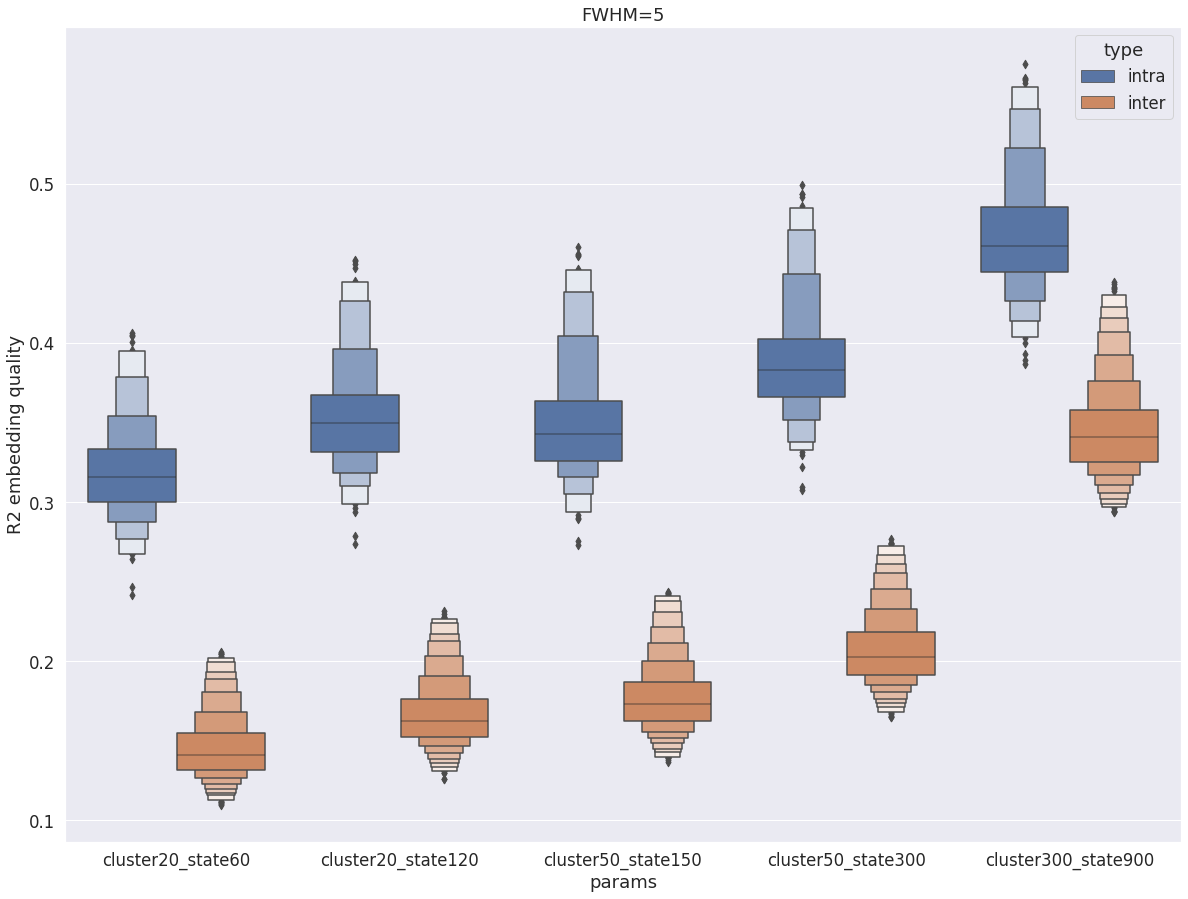

In [5]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))
val_r2 = val_r2.append(pd.read_pickle(inter60))
val_r2 = val_r2.append(pd.read_pickle(inter120))
val_r2 = val_r2.append(pd.read_pickle(inter150))
val_r2 = val_r2.append(pd.read_pickle(inter300))
val_r2 = val_r2.append(pd.read_pickle(inter900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='params', y='r2', hue='type', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

## R2 with `fwhm=8`

In [6]:
path_results = '/data/cisl/pbellec/cneuromod_embeddings/xp_202012/r2_friends-s01_cortex/'
fwhm = 8

# DYPAC
dypac60  = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-60.p')
dypac120 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-20_state-120.p')
dypac150 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-150.p')
dypac300 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-50_state-300.p')
dypac900 = os.path.join(path_results, f'r2_fwhm-intra_fwhm-{fwhm}_cluster-300_state-900.p')

# DYPAC inter-subject
inter60  = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-60.p')
inter120 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-20_state-120.p')
inter150 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-150.p')
inter300 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-50_state-300.p')
inter900 = os.path.join(path_results, f'r2_fwhm-inter_fwhm-{fwhm}_cluster-300_state-900.p')

# DIFUMO
difumo256  = os.path.join(path_results, f'r2_fwhm-difumo256_fwhm-{fwhm}.p')
difumo512  = os.path.join(path_results, f'r2_fwhm-difumo512_fwhm-{fwhm}.p')
difumo1024 = os.path.join(path_results, f'r2_fwhm-difumo1024_fwhm-{fwhm}.p')

# MIST
mist197 = os.path.join(path_results, f'r2_fwhm-mist197_fwhm-{fwhm}.p')
mist444 = os.path.join(path_results, f'r2_fwhm-mist444_fwhm-{fwhm}.p')

# Schaefer
schaefer = os.path.join(path_results, f'r2_fwhm-schaefer_fwhm-{fwhm}.p')

# Smith
smith70 = os.path.join(path_results, f'r2_fwhm-smith_fwhm-{fwhm}.p')

### DYPAC intra vs DIFUMO
When repeating the experiment with `fwhm=8` the qualitative conclusions on dypac vs difumo are identical with `fwhm=5`. But a striking difference is a huge boost in R2 (almost doubling) for both parcelation. This shows that the R2 metric is very sensitive to the level of smoothness in the data.

Text(0.5, 1.0, 'FWHM=8')

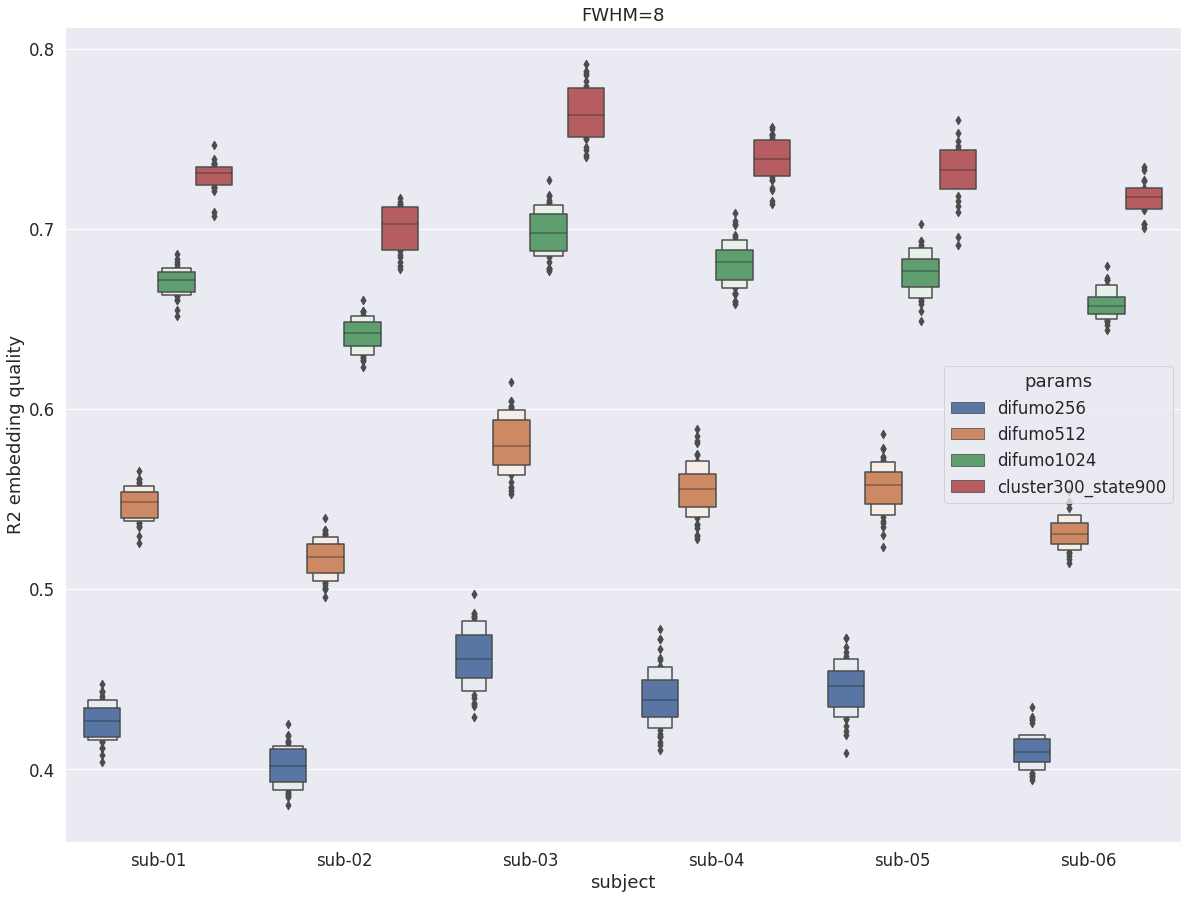

In [7]:
val_r2 = pd.read_pickle(difumo256)
val_r2 = val_r2.append(pd.read_pickle(difumo512))
val_r2 = val_r2.append(pd.read_pickle(difumo1024))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### DYPAC intra vs other group parcellations
The exact same observations hold for traditional parcellations: same qualitative conclusion for `fwhm=8` and `fwhm=5`, but near doubling of R2 with increased smoothing.

Text(0.5, 1.0, 'FWHM=8')

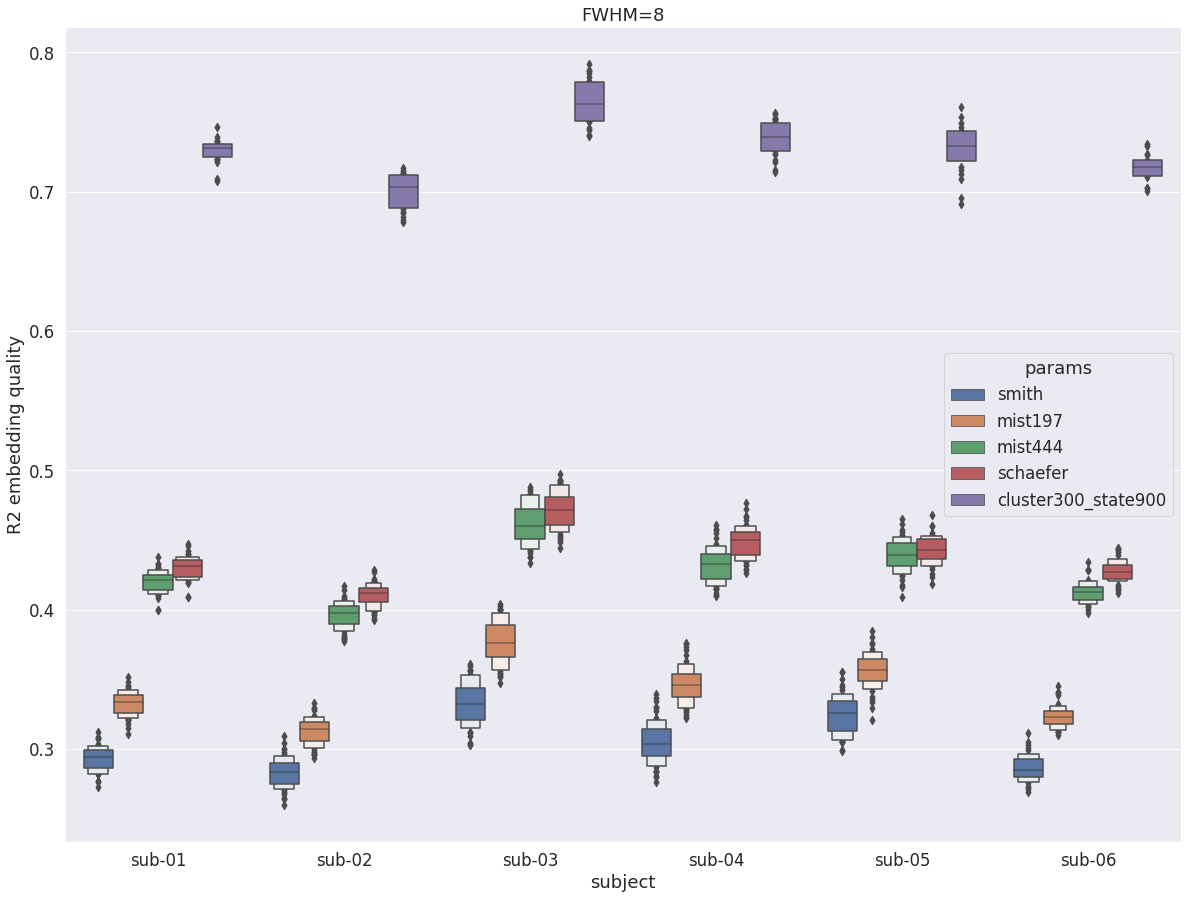

In [8]:
val_r2 = pd.read_pickle(smith70)
val_r2 = val_r2.append(pd.read_pickle(mist197))
val_r2 = val_r2.append(pd.read_pickle(mist444))
val_r2 = val_r2.append(pd.read_pickle(schaefer))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### MIST multi resolution
Once again with `fwhm=8` we see the number of `state` being a huge driver of R2. But we can also note that modest numbers of states (120, 150) are enough to reach high levels of R2 (0.5), while 900 states provide very high R2 (0.7). The low resolution solutions are thus an accurate summary of fluctuations at low spatial resolution. So even if the R2 of 120 and 150 states is comparatively lower with `fwhm=5` they still capture important characteristics of the data, and should be investigated in parallel to a granular and high precision solution (`cluster-300_state-900`).

Text(0.5, 1.0, 'FWHM=8')

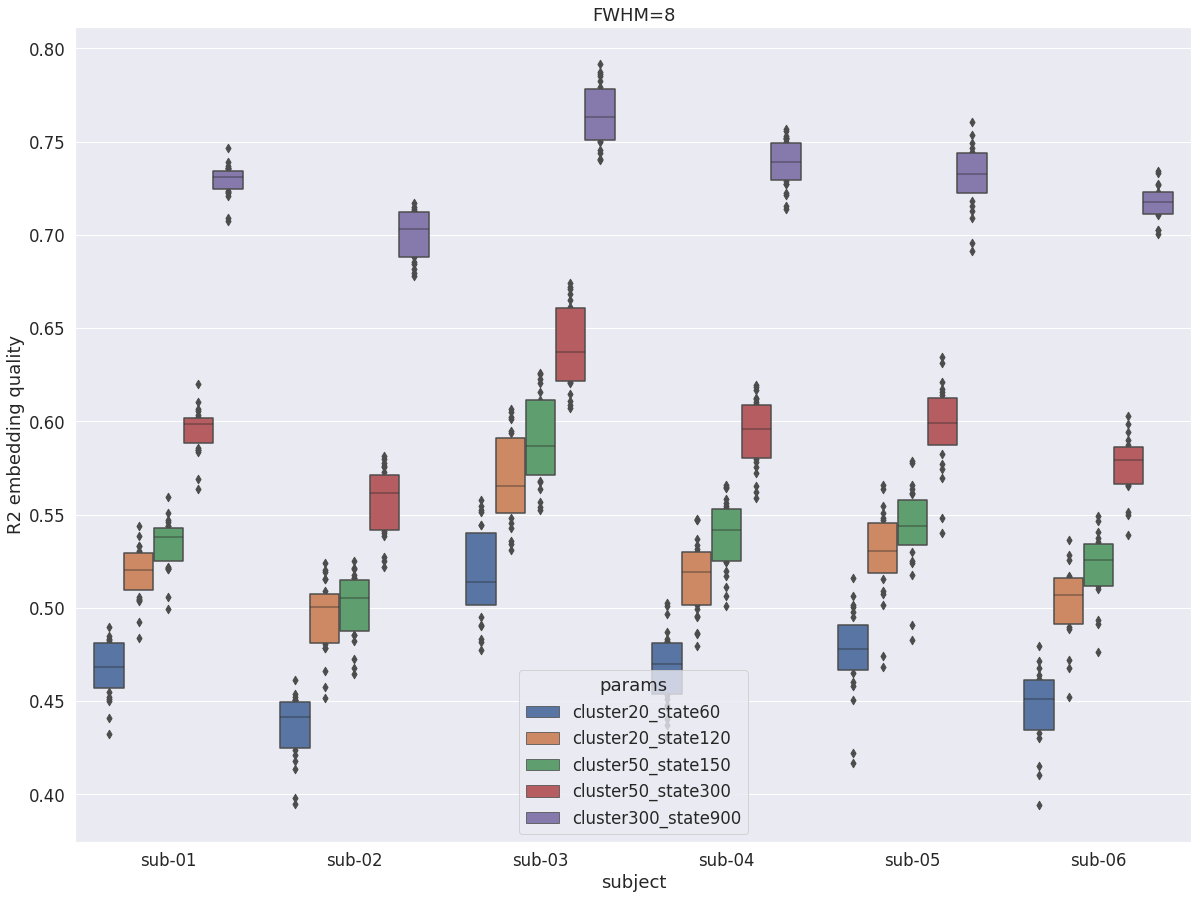

In [9]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='subject', y='r2', hue='params', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')

### Intra vs inter subject R2
Same conclusion for `fwhm=8` and `fwhm=5`: intra-subject R2 is markedly superior to inter-subject R2. However the gap tightens with `fwhm=8`.

Text(0.5, 1.0, 'FWHM=8')

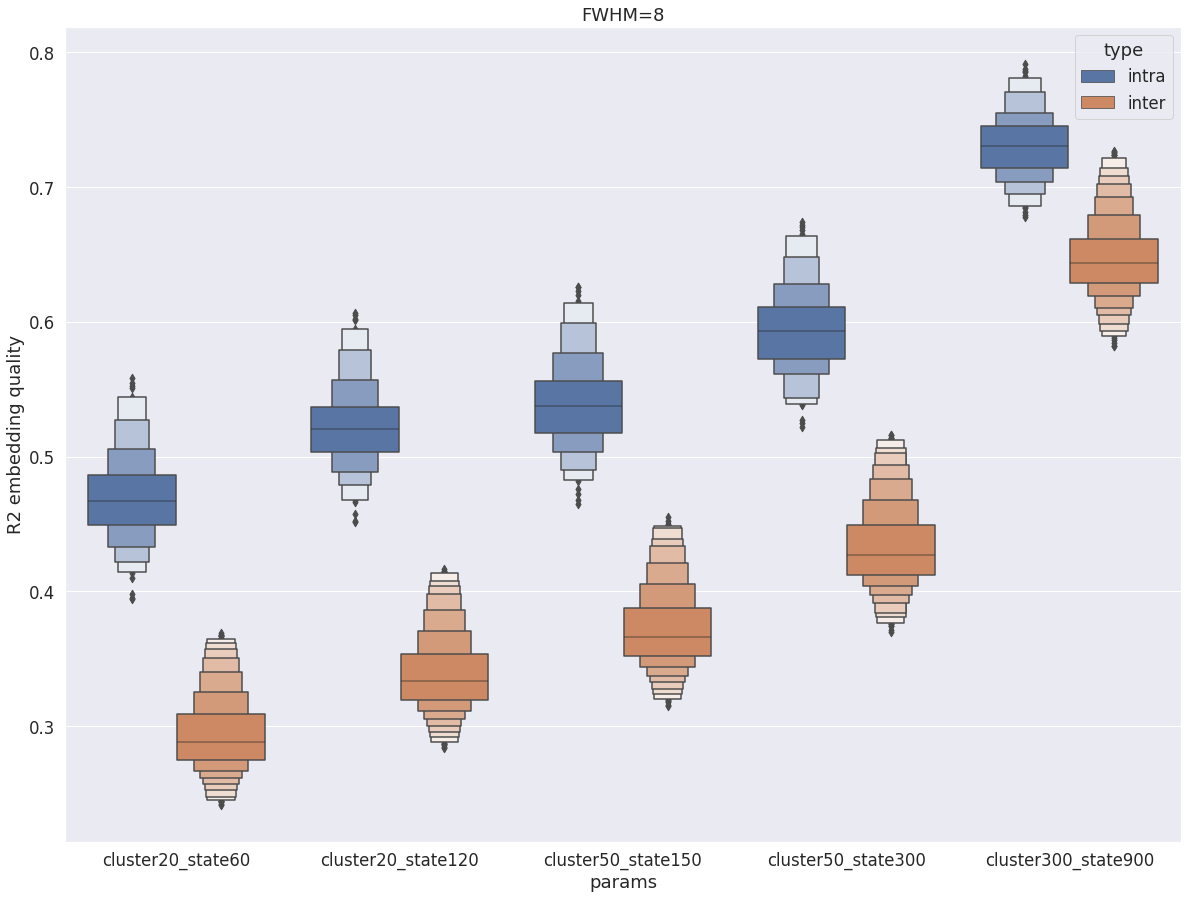

In [10]:
val_r2 = pd.read_pickle(dypac60)
val_r2 = val_r2.append(pd.read_pickle(dypac120))
val_r2 = val_r2.append(pd.read_pickle(dypac150))
val_r2 = val_r2.append(pd.read_pickle(dypac300))
val_r2 = val_r2.append(pd.read_pickle(dypac900))
val_r2 = val_r2.append(pd.read_pickle(inter60))
val_r2 = val_r2.append(pd.read_pickle(inter120))
val_r2 = val_r2.append(pd.read_pickle(inter150))
val_r2 = val_r2.append(pd.read_pickle(inter300))
val_r2 = val_r2.append(pd.read_pickle(inter900))

fig = plt.figure(figsize=(20, 15))
sns.boxenplot(data=val_r2, x='params', y='r2', hue='type', scale='area')
plt.ylabel('R2 embedding quality')
plt.title(f'FWHM={fwhm}')